In [1]:
#importing the required library 
import pandas as pd #for data handling and manipulation
import numpy as np # for array and numerical 
import matplotlib.pyplot as plt # for plloting 
from sklearn.model_selection import train_test_split # for spliting data set

In [2]:
df = pd.read_csv("/content/train_wn75k28.csv") # loading the data from csv

In [3]:
df.head() #printing 1st 5 rows

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2021-01-01,4,6,NaN,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0


In [4]:
df.shape # printing shape i.e dimensions of the dataframe

(39161, 19)

In [5]:
df.info() # displaying info about the data null values, datatype ,etc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39161 entries, 0 to 39160
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39161 non-null  int64  
 1   created_at            39161 non-null  object 
 2   campaign_var_1        39161 non-null  int64  
 3   campaign_var_2        39161 non-null  int64  
 4   products_purchased    18250 non-null  float64
 5   signup_date           24048 non-null  object 
 6   user_activity_var_1   39161 non-null  int64  
 7   user_activity_var_2   39161 non-null  int64  
 8   user_activity_var_3   39161 non-null  int64  
 9   user_activity_var_4   39161 non-null  int64  
 10  user_activity_var_5   39161 non-null  int64  
 11  user_activity_var_6   39161 non-null  int64  
 12  user_activity_var_7   39161 non-null  int64  
 13  user_activity_var_8   39161 non-null  int64  
 14  user_activity_var_9   39161 non-null  int64  
 15  user_activity_var_1

In [6]:
df.describe() # decribe finction without any parameters prints statatical values of all numerical variables

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
count,39161.000000,39161.000000,39161.000000,18250.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000
mean,19581.000000,6.523812,6.452746,2.154137,0.400092,0.006716,0.102832,0.011465,0.151503,0.499834,0.286612,0.174434,0.011440,0.000383,0.218942,0.000562,0.051020
std,11304.951283,3.472944,2.614296,0.779815,0.509194,0.081676,0.303743,0.106463,0.359681,0.558166,0.455784,0.379689,0.106346,0.019568,0.431544,0.023696,0.220042
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9791.000000,4.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19581.000000,6.000000,6.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,29371.000000,9.000000,8.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,39161.000000,16.000000,15.000000,4.000000,3.000000,1.000000,1.000000,1.000000,2.000000,3.000000,2.000000,2.000000,1.000000,1.000000,4.000000,1.000000,1.000000


In [7]:
df.isnull().sum() # now printing null values count

id                          0
created_at                  0
campaign_var_1              0
campaign_var_2              0
products_purchased      20911
signup_date             15113
user_activity_var_1         0
user_activity_var_2         0
user_activity_var_3         0
user_activity_var_4         0
user_activity_var_5         0
user_activity_var_6         0
user_activity_var_7         0
user_activity_var_8         0
user_activity_var_9         0
user_activity_var_10        0
user_activity_var_11        0
user_activity_var_12        0
buy                         0
dtype: int64

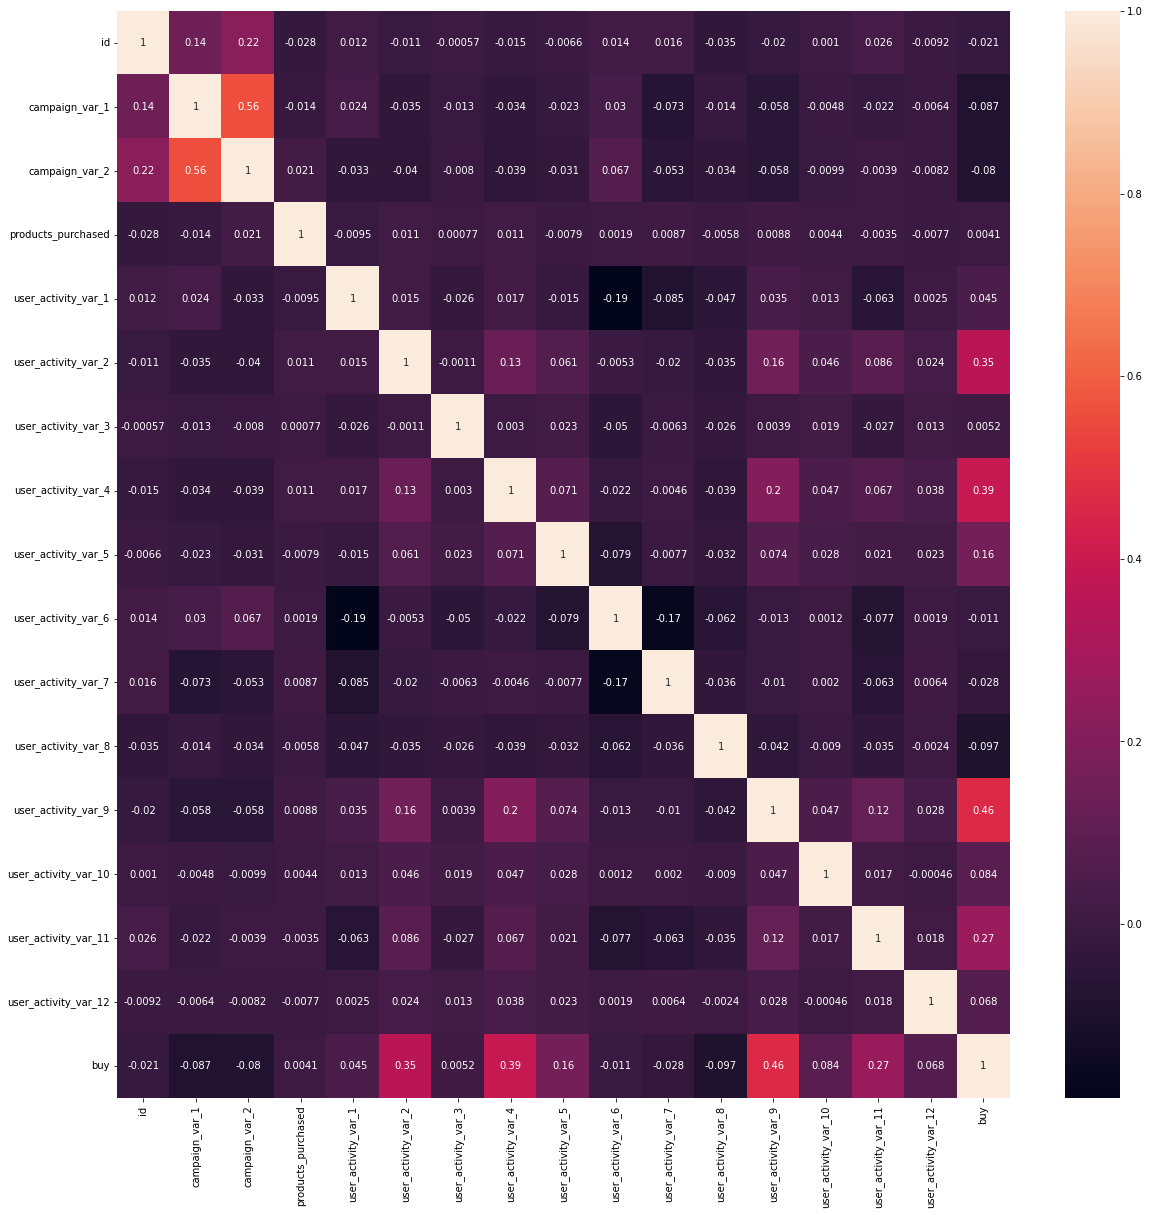

In [8]:
# plotting correlation chart using seaborn
import seaborn as sns
df.corr()
fig, ax = plt.subplots(figsize=(20,20)) 
ax = sns.heatmap(df.corr(), annot=True)

In [9]:
# feature engineering - combining columns with high correlation to make new column name combined user activity
df['combine_user_activity']=0
for i in range(df.shape[0]):
  if(df['user_activity_var_2'][i]+df['user_activity_var_4'][i]+df['user_activity_var_9'][i]):
    df['combine_user_activity'][i]=1
  else:
    df['combine_user_activity'][i]=0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


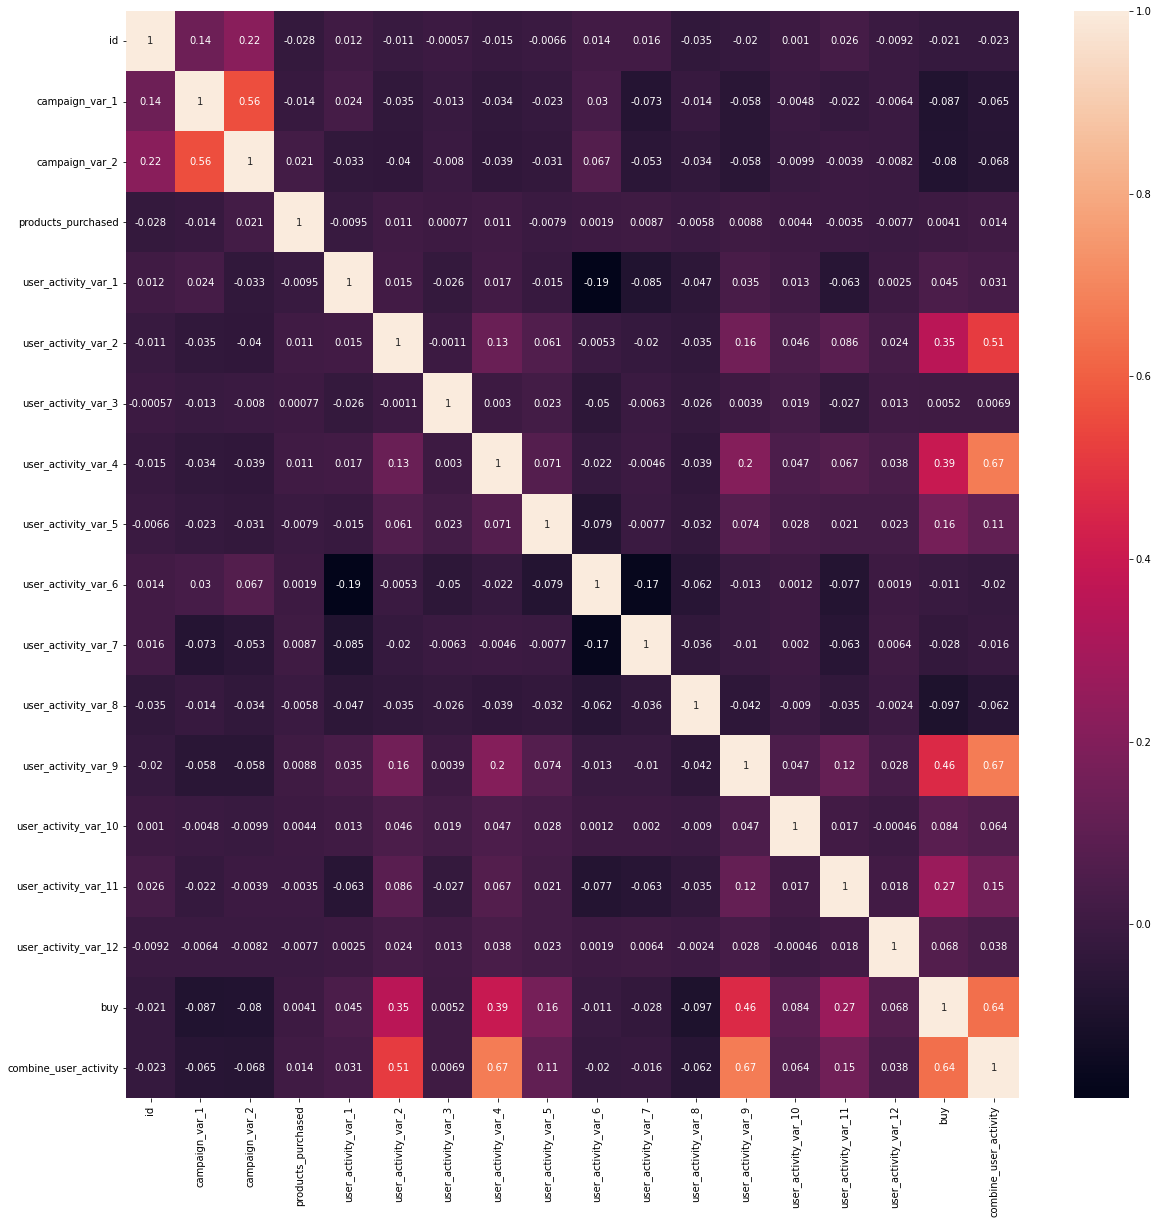

In [10]:
# again ploting correlation graph to see correlation with newly created column
import seaborn as sns
df.corr()
fig, ax = plt.subplots(figsize=(20,20)) 
ax = sns.heatmap(df.corr(), annot=True)

In [11]:
# feature selection - selecting only features with high correlation
X= df[['user_activity_var_5','user_activity_var_10','user_activity_var_11','combine_user_activity']]
Y= df[['buy']]

In [12]:
#Spliting the data in 20:80 ratio for testing and training 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,)

In [13]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import classification_report #for printing evaluation matrix

In [14]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,Y_train)


#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [15]:
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.9756159836588791


In [16]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7446
           1       0.93      0.55      0.69       387

    accuracy                           0.98      7833
   macro avg       0.95      0.77      0.84      7833
weighted avg       0.97      0.98      0.97      7833



In [17]:
dtf = pd.read_csv('/content/test_Wf7sxXF.csv') # loading the test data

In [18]:
# performing same operation of combining variables as we did in training data
dtf['combine_user_activity']=0
for i in range(dtf.shape[0]):
  if(dtf['user_activity_var_2'][i]+dtf['user_activity_var_4'][i]+dtf['user_activity_var_9'][i]):
    dtf['combine_user_activity'][i]=1
  else:
    dtf['combine_user_activity'][i]=0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [19]:
# selecting same set of features as we did previously
Xt= dtf[['user_activity_var_5','user_activity_var_10','user_activity_var_11','combine_user_activity']]

In [20]:
# predicting the values on test data
pred_t = clf.predict(Xt)

In [21]:
#combining predicted values and corresponding id 
d = pd.DataFrame({'id': dtf['id'], 'buy': pred_t.flatten()})
d

,id,buy
0,39162,1
1,39163,0
2,39164,0
3,39165,1
4,39166,0
...,...,...
13179,52341,0
13180,52342,0
13181,52343,0
13182,52344,0


In [22]:
# saving the predicted values and id in csv file
from google.colab import files
d.to_csv('submit.csv' ,index=False,encoding = 'utf-8-sig')
files.download('submit.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>